<a href="https://colab.research.google.com/github/akash3952/diabetes_pred/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
import pickle
import joblib
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
#Standardizing the data
scaler = StandardScaler()
X = df.drop('Diabetes_012',axis=1) #Drop the dependent variable
y = df['Diabetes_012']
scaled_data = scaler.fit_transform(X)
scaled_data.shape

(253680, 21)

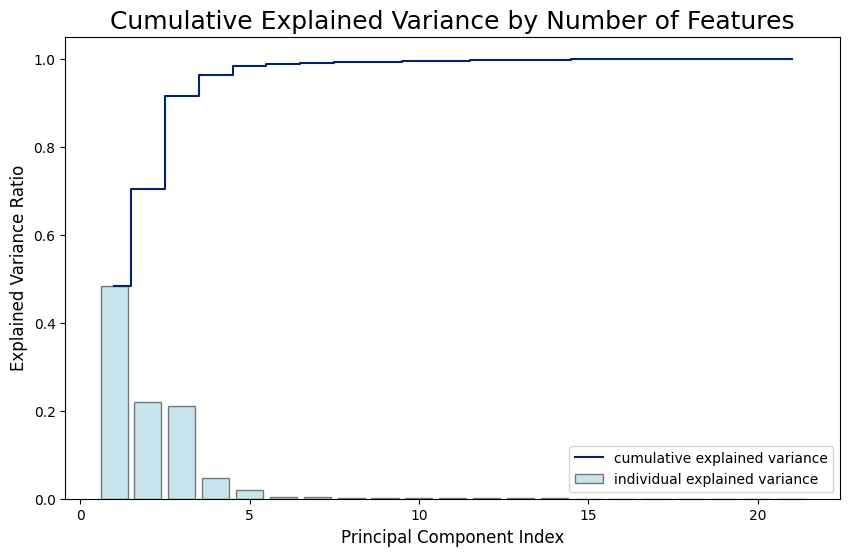

In [10]:
# Apply PCA
cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Calculate cumulative sum of explained variances.
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.figure(figsize=(10,6))
plt.bar(range(1,22), var_exp, alpha=0.5, align='center', label='individual explained variance', color='#93c9db', edgecolor = 'black')
plt.step(range(1,22), cum_var_exp, where='mid', label='cumulative explained variance', color='#00246d')
plt.title('Cumulative Explained Variance by Number of Features', fontsize=18)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xlabel('Principal Component Index', fontsize=12)
plt.legend(loc='best')
plt.show()

In [11]:
# 99% of the variance is explained with seven components.
print(f'Cumulative explained variance from PCA components: {cum_var_exp[6]:.3f}.')
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

Cumulative explained variance from PCA components: 0.991.


In [12]:
#Split data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train.shape

(177576, 7)

In [13]:
#Creating a randomforest model
rf_classifier = RandomForestClassifier()

#Tuning hyperparameters
param_grid = {
    'n_estimators': [10,50,100,150,200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [1,3,5,7],
    'max_features': ['auto','sqrt','log2',None]
}

#Creating RandomizedSerachCV object to find the optimial values of parameters
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring='accuracy')

In [15]:
rf_tuned_model = random_search.best_estimator_
print(rf_tuned_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=10,
                       n_estimators=50)


In [18]:
with open('random_forest_tuned.pkl', 'wb') as file:
    pickle.dump(rf_tuned_model, file)